In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

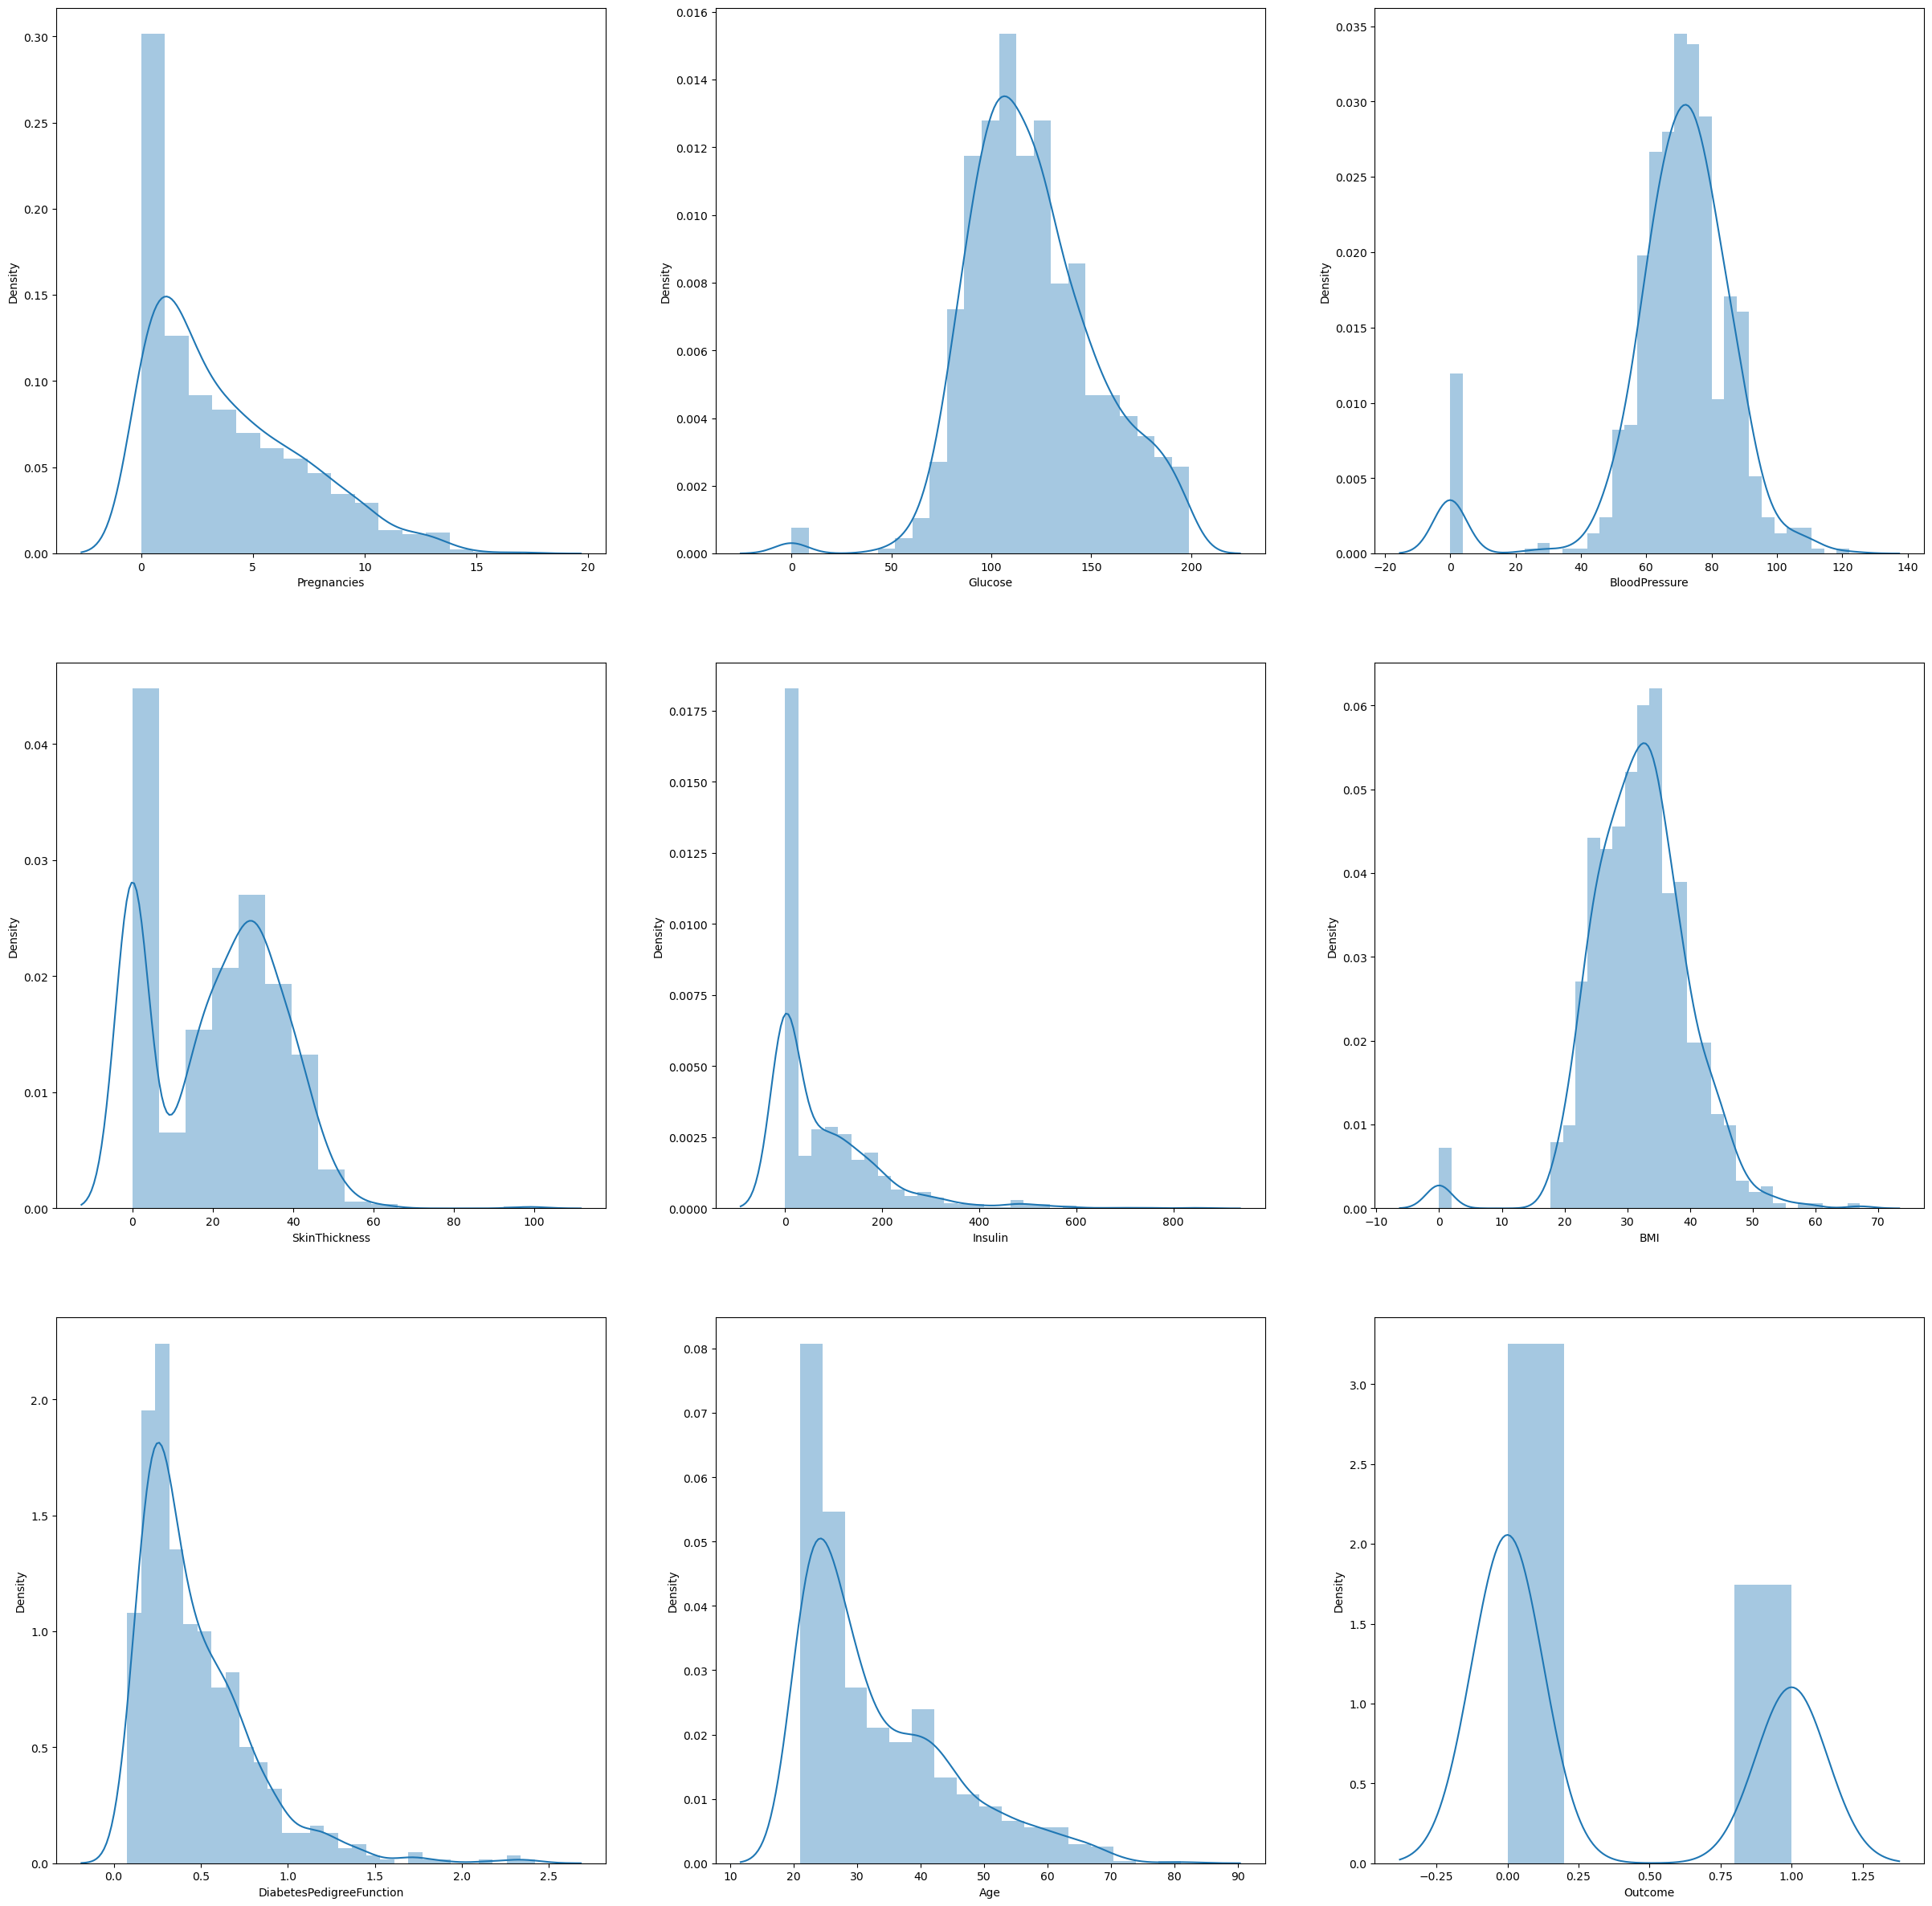

In [7]:
fig, axes= plt.subplots(3,3, figsize=(30,30))
axes= axes.flatten()
index=0

for i in df.columns:
    sns.distplot(df[i], ax=axes[index])
    index= index+1
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\

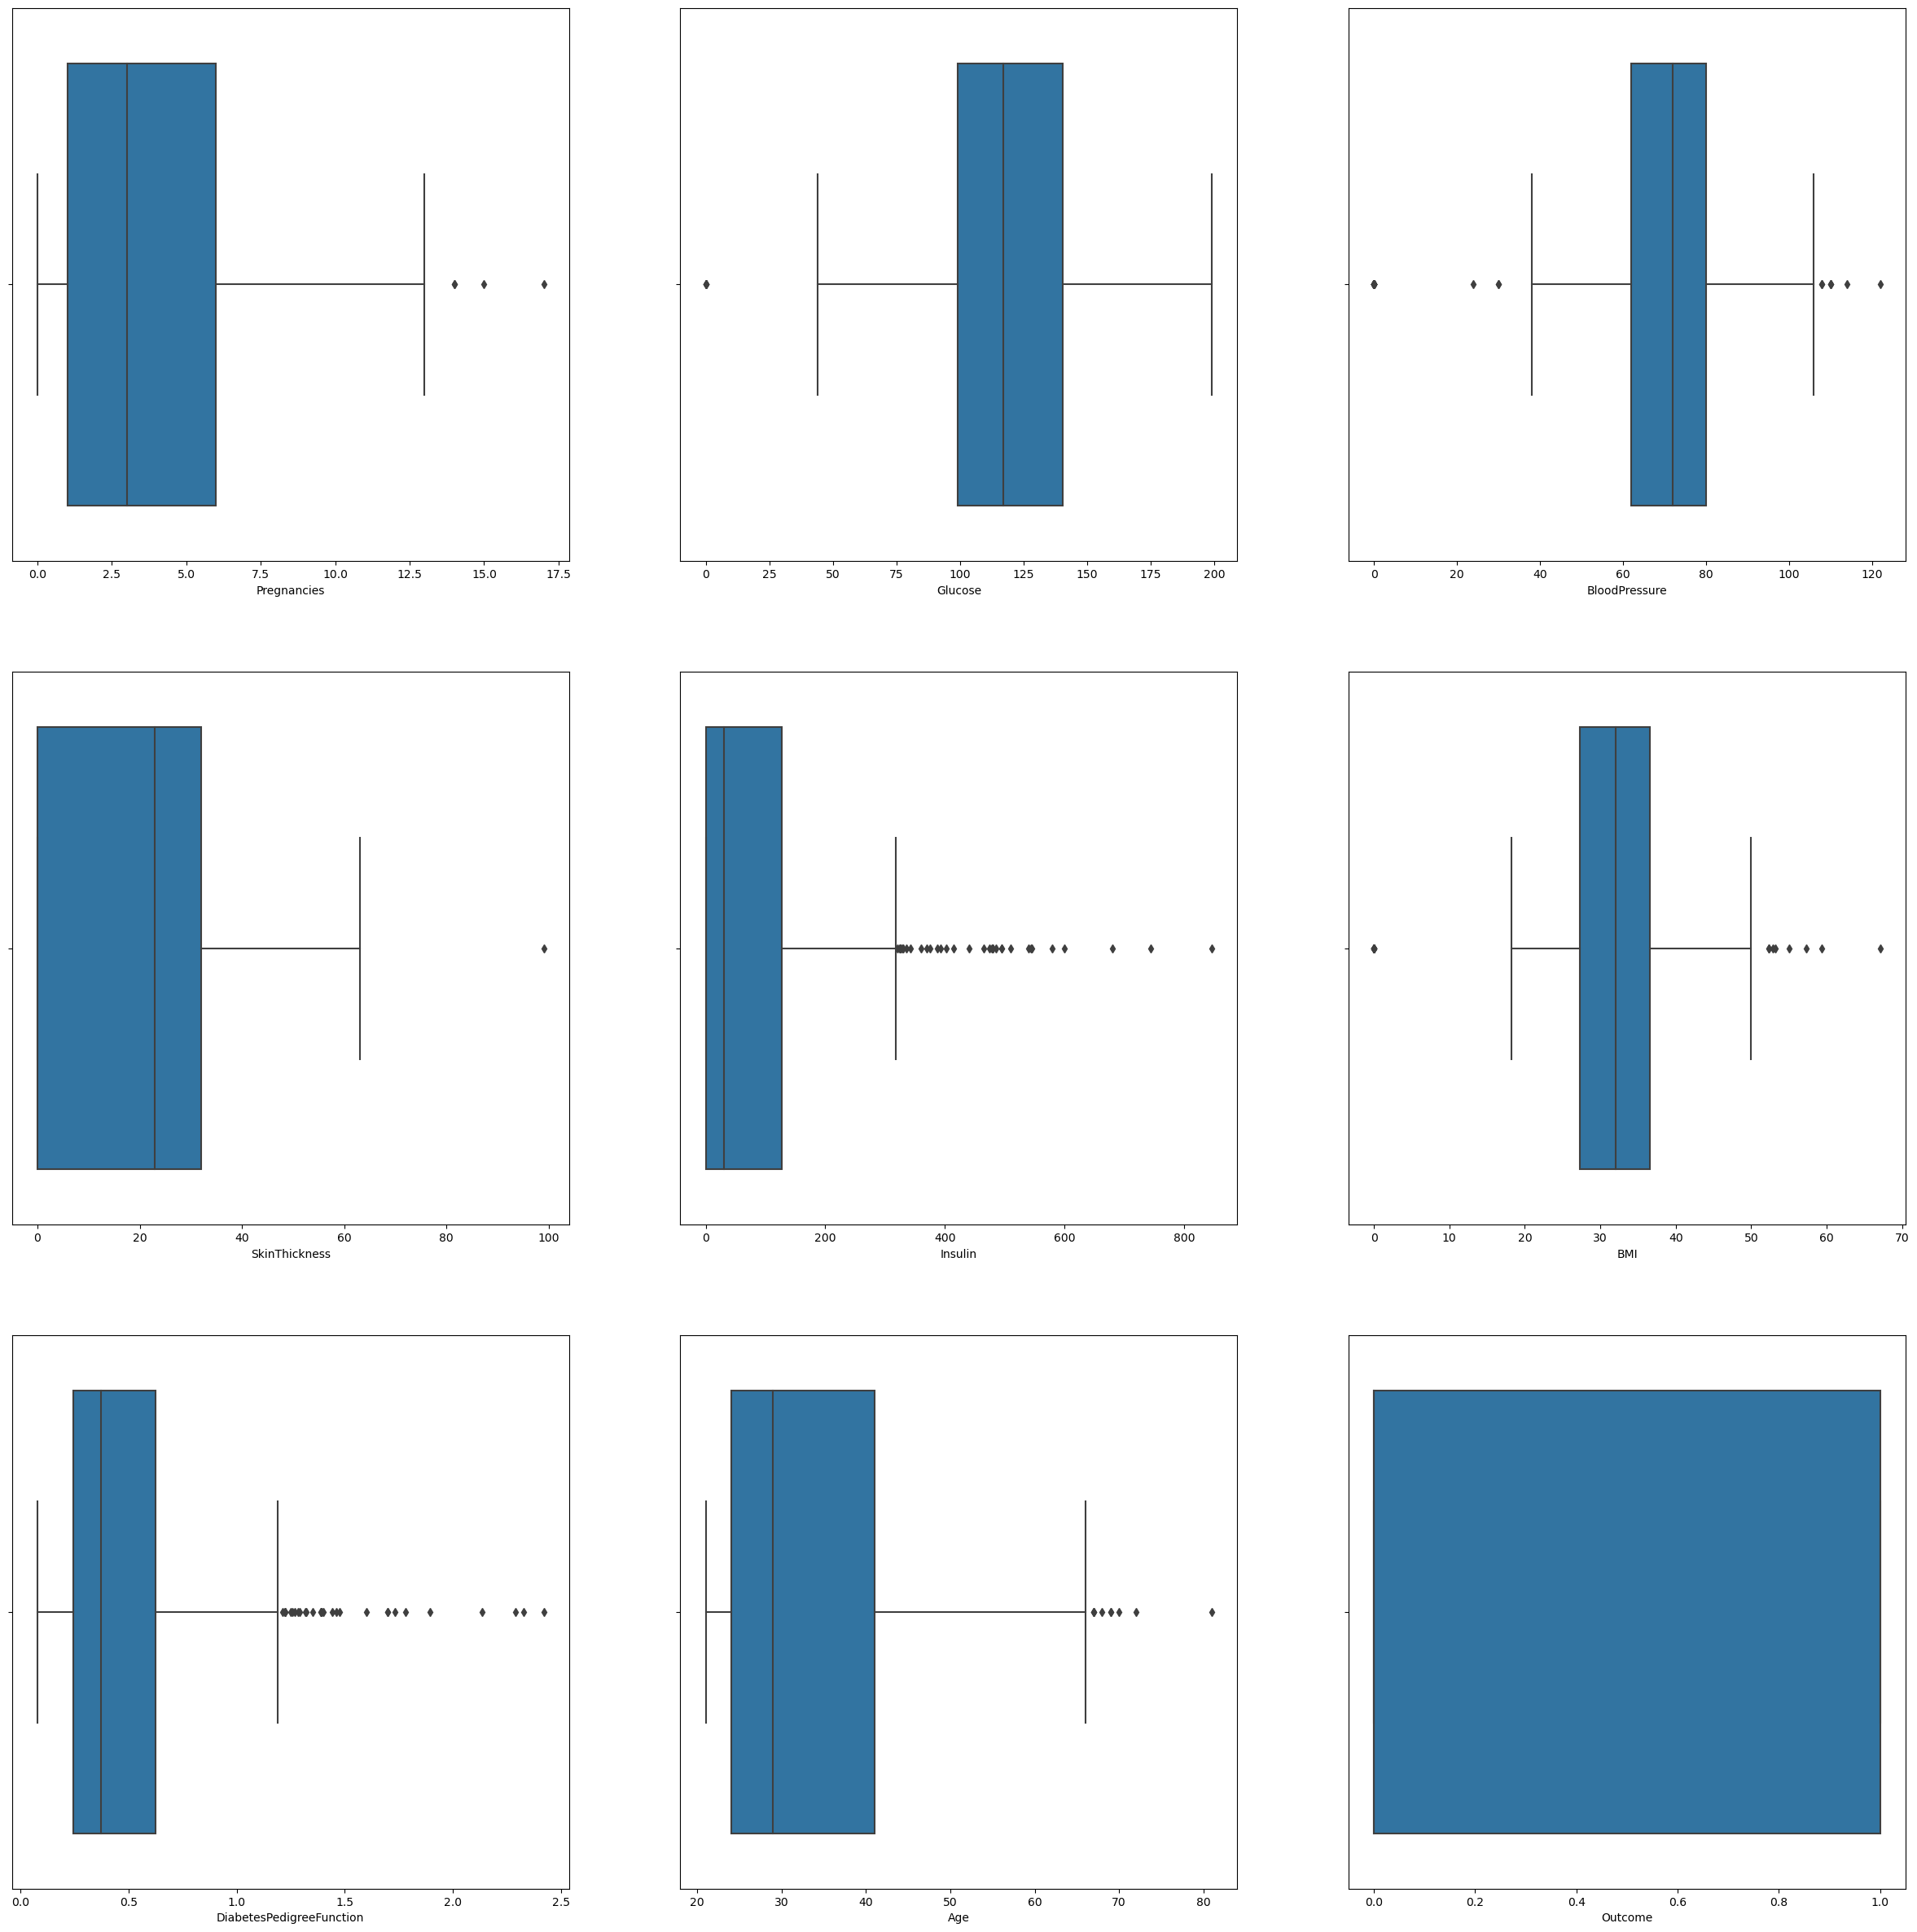

In [9]:
fig, axes= plt.subplots(3,3, figsize=(30,30))
axes= axes.flatten()
index=0

for i in df.columns:
    sns.boxplot(df[i], ax=axes[index])
    index= index+1
plt.show()

In [10]:
Q1= df.quantile(0.25)
Q3= df.quantile(0.75)
IQR= Q3-Q1
IQR

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64

In [12]:
df= df[~((df < (Q1-1.5*IQR)) | (df > (Q3+1.5*IQR))).any(axis=1) ]

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\

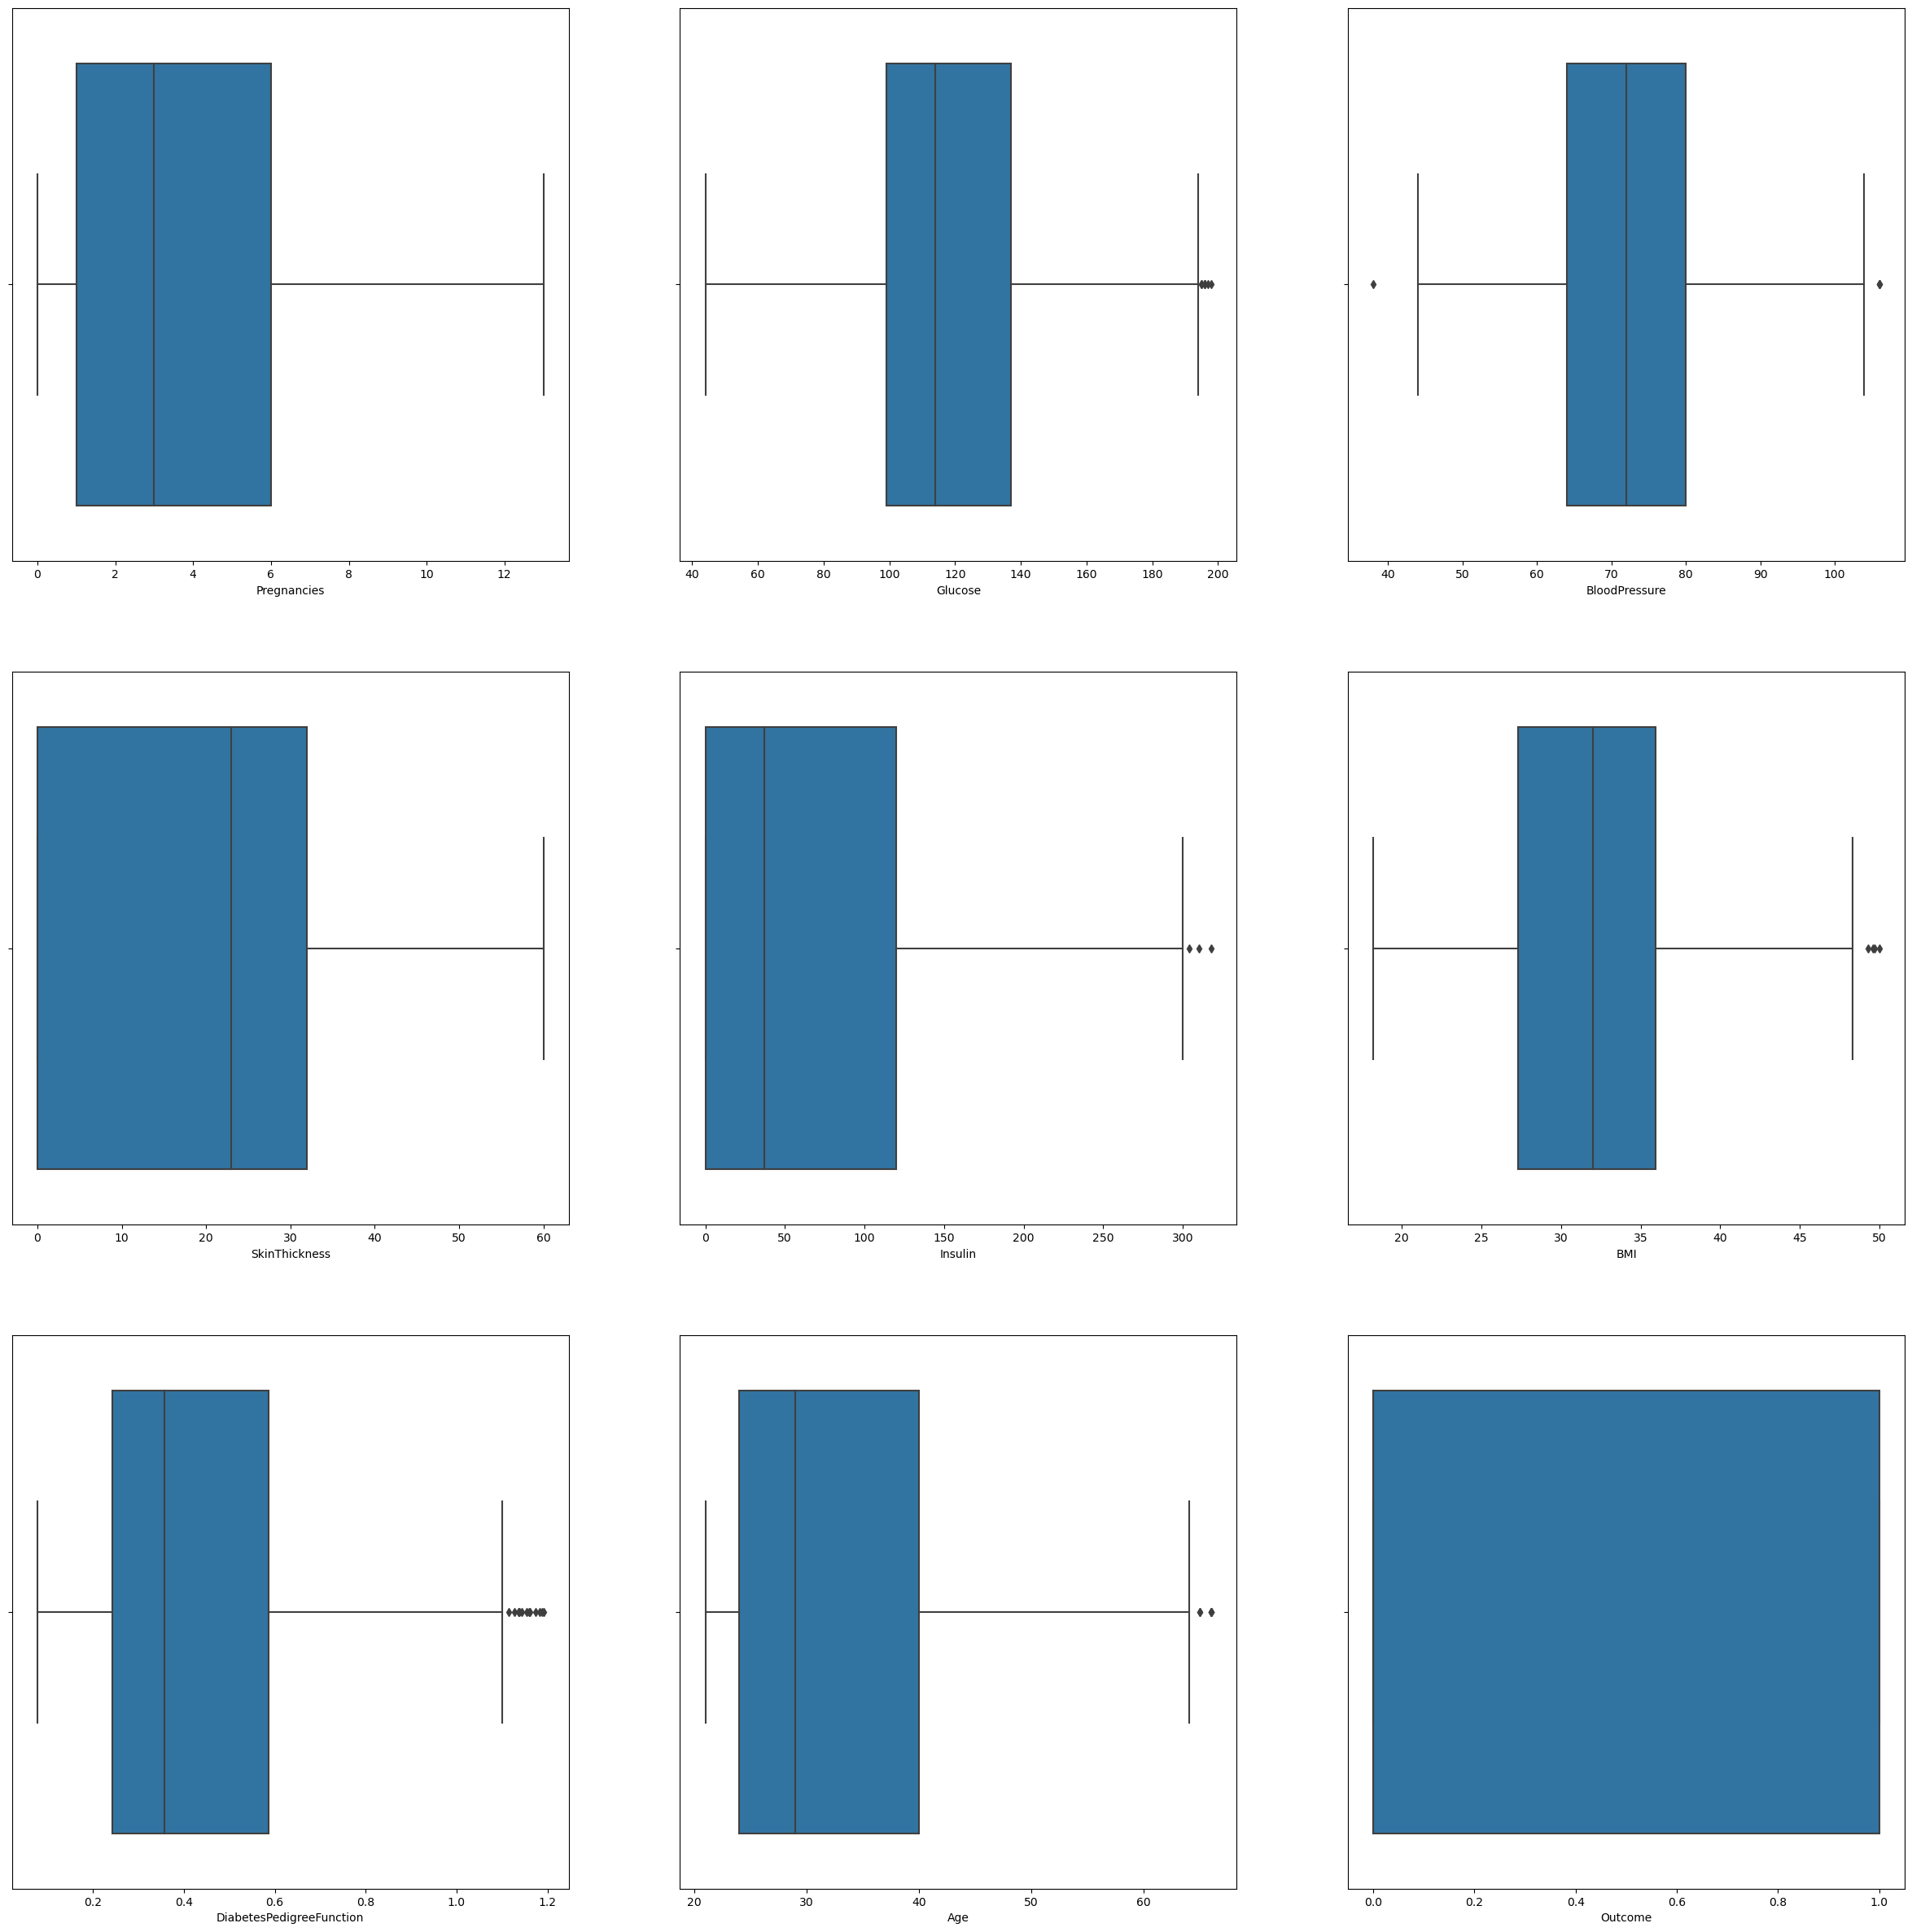

In [13]:
fig, axes= plt.subplots(3,3, figsize=(30,30))
axes= axes.flatten()
index=0

for i in df.columns:
    sns.boxplot(df[i], ax=axes[index])
    index= index+1
plt.show()

<AxesSubplot:>

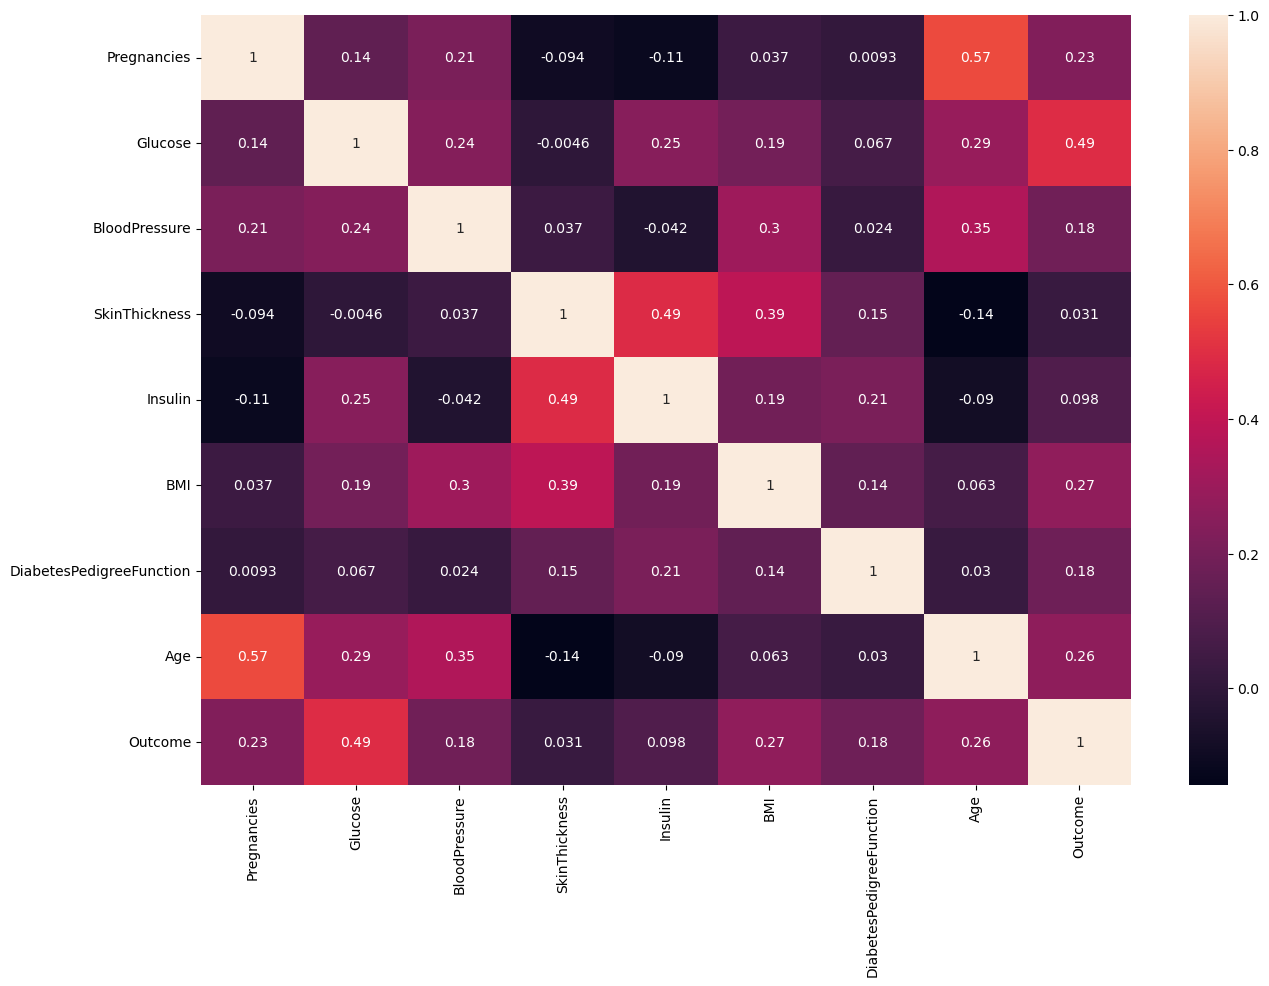

In [14]:
fig= plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt=".2g")

In [15]:
col_list=[]
for i in df.columns:
    if (i != "Outcome"):
        col_list= np.append(col_list, i)

from statsmodels.stats.outliers_influence import variance_inflation_factor

X= df[col_list]
vif= pd.DataFrame()
vif["Features"]= X.columns
vif["VIF"]= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif

,Features,VIF
0,Pregnancies,3.484846
1,Glucose,20.947945
2,BloodPressure,37.356434
3,SkinThickness,4.430741
4,Insulin,2.554788
5,BMI,30.960665
6,DiabetesPedigreeFunction,4.100191
7,Age,16.588756


In [16]:
df=df.reset_index(drop=True)

In [17]:
x=df.iloc[:,:-1]
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
634,10,101,76,48,180,32.9,0.171,63
635,2,122,70,27,0,36.8,0.340,27
636,5,121,72,23,112,26.2,0.245,30
637,1,126,60,0,0,30.1,0.349,47


In [18]:
y=df.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      0
      ..
634    0
635    0
636    0
637    1
638    0
Name: Outcome, Length: 639, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=50)

In [21]:
from sklearn.preprocessing import StandardScaler

scale= StandardScaler()
x_train= scale.fit_transform(x_train)
x_test= scale.fit_transform(x_test)

In [22]:
from sklearn.naive_bayes import GaussianNB


In [23]:
gnb= GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [24]:
y_prd = gnb.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_test, y_prd))
cnf_matrix_0= confusion_matrix(y_test, y_prd)        # 0 Attributes are dropped 
print(cnf_matrix_0)

0.796875
[[117  19]
 [ 20  36]]


In [26]:
#after performing vif

In [28]:
df.drop("BloodPressure", axis=1, inplace=True)

In [29]:
col_list=[]
for i in df.columns:
    if (i != "Outcome"):
        col_list= np.append(col_list, i)

from statsmodels.stats.outliers_influence import variance_inflation_factor

X= df[col_list]
vif= pd.DataFrame()
vif["Features"]= X.columns
vif["VIF"]= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif

,Features,VIF
0,Pregnancies,3.477560
1,Glucose,18.481938
2,SkinThickness,4.423879
3,Insulin,2.498530
4,BMI,21.067019
5,DiabetesPedigreeFunction,4.079127
6,Age,14.504382


In [30]:
df.drop("BMI", axis=1, inplace=True)

In [31]:
col_list=[]
for i in df.columns:
    if (i != "Outcome"):
        col_list= np.append(col_list, i)

from statsmodels.stats.outliers_influence import variance_inflation_factor

X= df[col_list]
vif= pd.DataFrame()
vif["Features"]= X.columns
vif["VIF"]= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif

,Features,VIF
0,Pregnancies,3.465296
1,Glucose,12.118370
2,SkinThickness,3.350005
3,Insulin,2.421666
4,DiabetesPedigreeFunction,3.868394
5,Age,13.458238


In [32]:
df.drop("Age", axis=1, inplace=True)

In [33]:
col_list=[]
for i in df.columns:
    if (i != "Outcome"):
        col_list= np.append(col_list, i)

from statsmodels.stats.outliers_influence import variance_inflation_factor

X= df[col_list]
vif= pd.DataFrame()
vif["Features"]= X.columns
vif["VIF"]= [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif

,Features,VIF
0,Pregnancies,2.442757
1,Glucose,5.849485
2,SkinThickness,3.338498
3,Insulin,2.368980
4,DiabetesPedigreeFunction,3.779250


In [35]:
x= df.iloc[:,:-1]
x

,Pregnancies,Glucose,SkinThickness,Insulin,DiabetesPedigreeFunction
0,6,148,35,0,0.627
1,1,85,29,0,0.351
2,8,183,0,0,0.672
3,1,89,23,94,0.167
4,5,116,0,0,0.201
...,...,...,...,...,...
634,10,101,48,180,0.171
635,2,122,27,0,0.340
636,5,121,23,112,0.245
637,1,126,0,0,0.349


In [36]:
y=df.iloc[:,-1]
y

0      1
1      0
2      1
3      0
4      0
      ..
634    0
635    0
636    0
637    1
638    0
Name: Outcome, Length: 639, dtype: int64

In [37]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [38]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=11)

In [39]:
scale= StandardScaler()
x_train= scale.fit_transform(x_train)
x_test= scale.fit_transform(x_test)

In [40]:
gnb= GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [41]:
y_pred_full = gnb.predict(x_test)

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test,y_pred_full)

0.7890625

In [43]:
print(confusion_matrix(y_test, y_pred_full))

[[79  8]
 [19 22]]
